In [ ]:
!pip install zat


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glob
import os
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate


In [ ]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Anomaly detection/http.log'

In [ ]:
log_to_df = LogToDataFrame()
columns = ['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','trans_depth','method','host','uri','referrer','version','user_agent','origin','request_body_len','response_body_len'	,'status_code','status_msg','info_code','info_msg','tags','username','password','proxied','orig_fuids','orig_filenames','orig_mime_types','resp_fuids','resp_filenames','resp_mime_types']
df = pd.read_csv(path, sep="\t", comment="#", header=None, names=columns)

In [ ]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,tags,username,password,proxied,orig_fuids,orig_filenames,orig_mime_types,resp_fuids,resp_filenames,resp_mime_types
0,1.691244e+09,CaHBXP3gSfZElnD9N2,192.168.130.134,45794,104.18.114.97,80,1,-,-,-,...,(empty),-,-,-,-,-,-,FQVLic1thm2BY5pf5h,-,text/plain
1,1.691244e+09,CaHBXP3gSfZElnD9N2,192.168.130.134,45794,104.18.114.97,80,2,-,-,-,...,(empty),-,-,-,-,-,-,FExfkp27U2c85JFofa,-,text/plain
2,1.691244e+09,CaHBXP3gSfZElnD9N2,192.168.130.134,45794,104.18.114.97,80,3,-,-,-,...,(empty),-,-,-,-,-,-,FylL2E1ZcfVXkD9bGh,-,text/plain
3,1.691244e+09,C1OFpZ3DCcZLORvBgf,192.168.130.134,55832,20.40.202.3,80,1,-,-,-,...,(empty),-,-,-,-,-,-,FwnqAA3xCMOyIaP9li,-,text/html
4,1.691244e+09,C1OFpZ3DCcZLORvBgf,192.168.130.134,55832,20.40.202.3,80,2,-,-,-,...,(empty),-,-,-,-,-,-,F425of9JaIjqpmbgb,-,-


In [ ]:
df.shape

(302, 30)

In [ ]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'trans_depth', 'method', 'host', 'uri', 'referrer', 'version',
       'user_agent', 'origin', 'request_body_len', 'response_body_len',
       'status_code', 'status_msg', 'info_code', 'info_msg', 'tags',
       'username', 'password', 'proxied', 'orig_fuids', 'orig_filenames',
       'orig_mime_types', 'resp_fuids', 'resp_filenames', 'resp_mime_types'],
      dtype='object')

In [ ]:
df = df.drop(['ts','trans_depth', 'host', 'uri','uid','id.orig_h','id.resp_h',
        'version',  'status_code', 'info_msg', 'tags','status_msg',
       'username', 'password', 'proxied', 'orig_fuids', 'orig_filenames',
       'orig_mime_types', 'resp_fuids', 'resp_filenames', 'resp_mime_types'],axis=1)

In [ ]:
df.isnull().sum()

id.orig_p            0
id.resp_p            0
method               0
referrer             0
user_agent           0
origin               0
request_body_len     0
response_body_len    0
info_code            0
dtype: int64

In [ ]:
df['method'].unique

<bound method Series.unique of 0      -
1      -
2      -
3      -
4      -
      ..
297    -
298    -
299    -
300    -
301    -
Name: method, Length: 302, dtype: object>

In [ ]:
# Separate categorical and numerical features

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# categorical_features = df.select_dtypes(include=['object']).columns

# label_encoder = LabelEncoder()
# for feature in categorical_features:
#     print(df[feature].unique())
#     df[feature]=label_encoder.fit_transform(df[feature])
#     print(df[feature].unique())


# Preprocessing - Numerical features (Standard Scaling)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

In [ ]:
numerical_features#, categorical_features

Index(['id.orig_p', 'id.resp_p', 'method', 'referrer', 'user_agent', 'origin',
       'request_body_len', 'response_body_len', 'info_code'],
      dtype='object')

In [ ]:
X_train = scaled_features


input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=30, batch_size=64, shuffle=True)

Epoch 1/30
5/5 [==============================] - 1s 5ms/step - loss: 0.4532
Epoch 2/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4458
Epoch 3/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4382
Epoch 4/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4308
Epoch 5/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4231
Epoch 6/30
5/5 [==============================] - 0s 4ms/step - loss: 0.4154
Epoch 7/30
5/5 [==============================] - 0s 3ms/step - loss: 0.4076
Epoch 8/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3996
Epoch 9/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3913
Epoch 10/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3830
Epoch 11/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3744
Epoch 12/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3657
Epoch 13/30
5/5 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
train_pred = autoencoder.predict(X_train)
train_mse = np.mean(np.square(X_train - train_pred), axis=1)

threshold = np.percentile(train_mse, 95)

10/10 [==============================] - 0s 2ms/step


In [ ]:
# threshold=0.55

In [ ]:
all_pred = autoencoder.predict(scaled_features)
all_mse = np.mean(np.square(scaled_features - all_pred), axis=1)

anomalies = df.loc[all_mse > threshold]

10/10 [==============================] - 0s 2ms/step


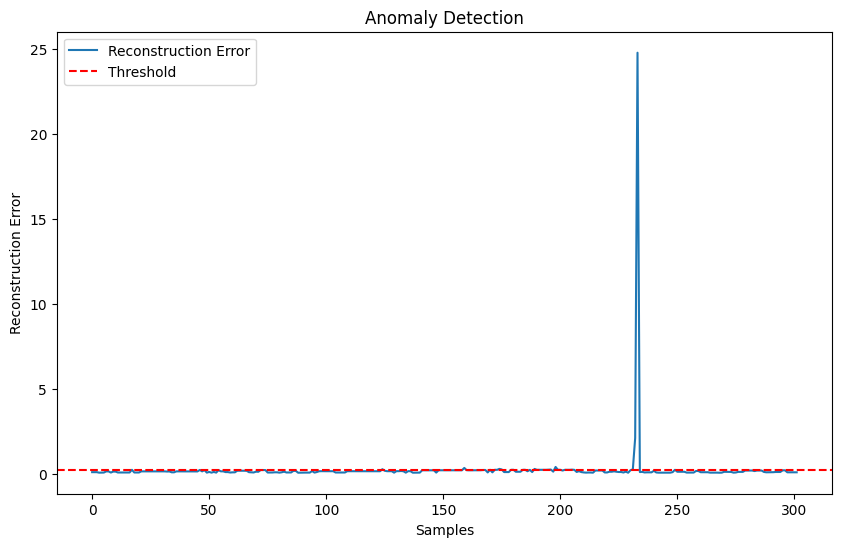

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(all_mse, label='Reconstruction Error')
# plt.plot(np.where(anomalies, train_mse, None), 'ro', label='Anomalies')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Samples')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

In [ ]:
autoencoder.save('/content/drive/MyDrive/Anomaly detection/anomalyDetection.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
